In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

experimental_df = pd.read_csv("./experimental.csv", sep=';', keep_default_na=False).set_index('peptide')
classification_df = pd.read_csv("./merged_clas.csv", keep_default_na=False).set_index('peptide')
regression_df = pd.read_csv("./merged_aps.csv", keep_default_na=False).set_index('peptide')
metrics_df = pd.read_csv("./peptide_metrics.csv", keep_default_na=False).rename(columns={"sequence": "peptide"}).set_index('peptide')
metrics_no_ap_df = pd.read_csv("./peptide_metrics_no_ap.csv", keep_default_na=False).rename(columns={"sequence": "peptide"}).set_index('peptide')

<Axes: title={'center': 'Peptide Length Distribution'}, xlabel='len'>

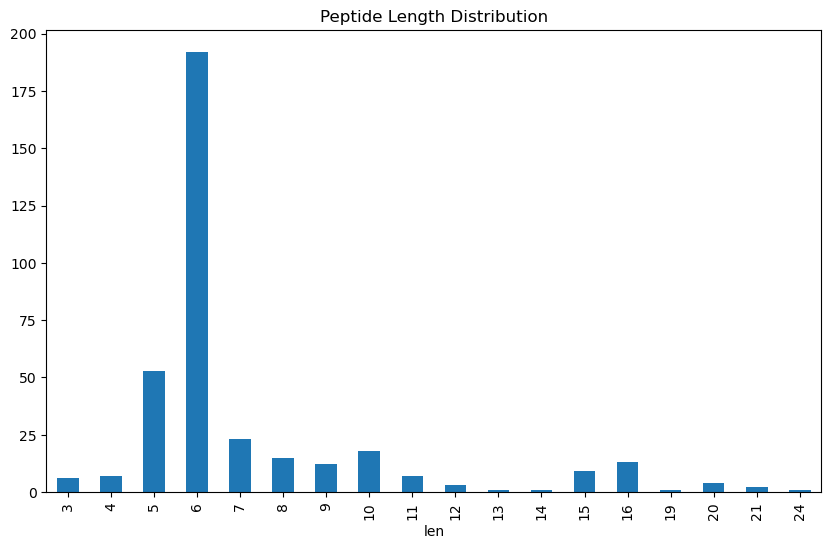

In [54]:
experimental_df['len'] = experimental_df.index.str.len()
experimental_df['len'].value_counts().sort_index().plot(kind='bar', title='Peptide Length Distribution', figsize=(10, 6))

In [55]:
len(experimental_df[experimental_df['len'] < 11])

326

In [56]:
len(experimental_df[experimental_df['len'] > 11])

35

"Out of 62 159 peptide samples, 4000 peptides are randomly selected as the test set. The remaining samples are divided into a training set and a validation set. The validation set contains another 4000 peptides, and the training set contains 54 159 peptides. The benchmark models are trained with the training set, and the fitted models are selected based on the performance of the validation set.

The dataset contains a regression task and a classification task. The original labels are expressed as AP values on a continuous space, which is a regression task. Based on the median value, the dataset is divided into two parts with low and high AP values, which are labelled into two classes. We exclude samples with AP values very close to the median value, as they are predicted to be inappropriate for both classes. The metrics used to evaluate the performance of the benchmark models in the regression task are mean absolute error (MAE), MSE and R-square (R
⁠); the metrics used to evaluate the performance of the benchmark models in the classification task are Accuracy (Acc), Precision, Recall and F1-score."

In [57]:
# check which peptides are in regression and not in classification, and get their min and max ap
peptides_in_regression_not_in_classification = regression_df.index.difference(classification_df.index)
if not peptides_in_regression_not_in_classification.empty:
    print("Peptides in regression but not in classification:")
    print(peptides_in_regression_not_in_classification)
    print("Min AP:", regression_df.loc[peptides_in_regression_not_in_classification, 'ap'].min())
    print("Max AP:", regression_df.loc[peptides_in_regression_not_in_classification, 'ap'].max())

Peptides in regression but not in classification:
Index(['AAARHY', 'AACMSERYCV', 'AACWLQVS', 'AADEPRALYW', 'AADWAVFWL',
       'AAFASPCQCL', 'AAFSAHYLS', 'AAFVWYGWT', 'AAFYSLNI', 'AAGHRQYGHN',
       ...
       'YYSAPLSMKL', 'YYSLPQIDNK', 'YYVHWDDAF', 'YYVRYRIITC', 'YYWCYMSDQ',
       'YYWLDLQLM', 'YYWYHRTMAN', 'YYYAQIVTGG', 'YYYSECEQY', 'YYYTGNIHAT'],
      dtype='object', name='peptide', length=20809)
Min AP: 1.658
Max AP: 1.887


In [58]:
amino_acid_dict = {
    'A': 'Ala', 'C': 'Cys', 'D': 'Asp', 'E': 'Glu', 'F': 'Phe', 'G': 'Gly',
    'H': 'Hse', 'I': 'Ile', 'K': 'Lys', 'L': 'Leu', 'M': 'Met', 'N': 'Asn',
    'P': 'Pro', 'Q': 'Gln', 'R': 'Arg', 'S': 'Ser', 'T': 'Thr', 'V': 'Val',
    'W': 'Trp', 'Y': 'Tyr'
}

amino_acid_dict_inv = {v.upper(): k for k, v in amino_acid_dict.items()}
def convert_to_1_letter(peptide):
    return ''.join([amino_acid_dict_inv[aa] for aa in peptide.split('-')])

beyond_tri = pd.read_csv('beyond_tri.txt', sep=' ', header=None, names=['peptide_tri', 'ap_beyond'])

beyond_tri['peptide'] = beyond_tri['peptide_tri'].apply(convert_to_1_letter)
beyond_tri['length'] = beyond_tri['peptide'].str.len()
beyond_tri = beyond_tri[beyond_tri['length'] > 2]
beyond_tri.drop(columns=['peptide_tri'], inplace=True)
beyond_tri

,ap_beyond,peptide,length
1,1.041021,AAA,3
2,1.062640,AAAA,4
3,1.090202,AAAAA,5
4,1.453839,AAAAAA,6
5,1.440201,AAAAAAA,7
...,...,...,...
59931,2.080066,VVVVVPF,7
59932,2.143019,VVVVVV,6
59933,2.131534,VVVVVVF,7
59934,2.144234,VVVVVVV,7


In [59]:
matching_peptides = pd.merge(regression_df, beyond_tri[['peptide', 'ap_beyond']], on='peptide', how='inner')
matching_peptides

,peptide,ap,len,ap_beyond
0,EQLNN,1.099,5,1.180018
1,ACNGG,1.350,5,1.502008
2,TTKRA,1.471,5,1.329033
3,EVQRT,1.547,5,1.571151
4,MNKTC,1.596,5,1.481488
5,CDWDM,1.702,5,1.550543
6,KENST,1.787,5,1.718219
7,IYHGR,1.842,5,1.747162
8,HFGDI,1.851,5,1.840178
9,GTYCD,1.865,5,1.686726


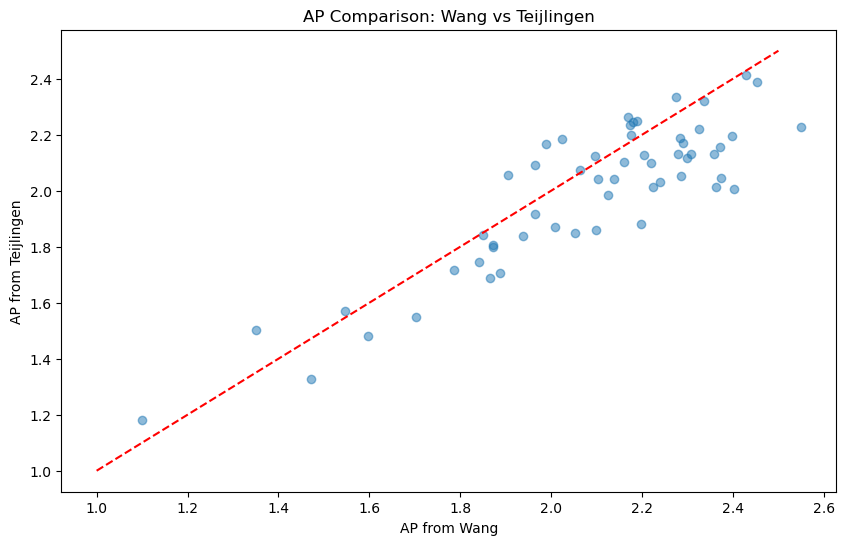

In [60]:
# plot the ap difference on a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(matching_peptides['ap'], matching_peptides['ap_beyond'], alpha=0.5)
plt.xlabel('AP from Wang')
plt.ylabel('AP from Teijlingen')
plt.title('AP Comparison: Wang vs Teijlingen')
plt.plot([1, 2.5], [1, 2.5], color='red', linestyle='--')
plt.savefig('ap_comparison_scatter.png')

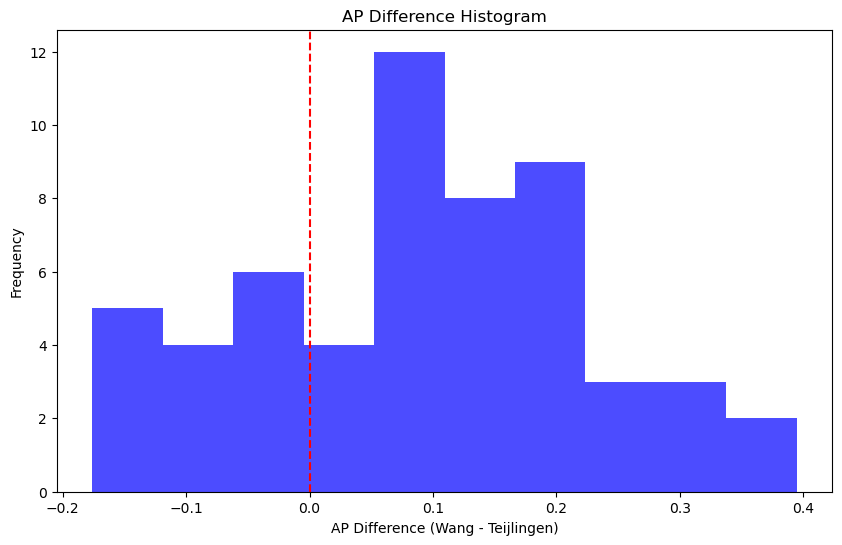

In [61]:
# plot the ap difference on a histogram
plt.figure(figsize=(10, 6))
plt.hist(matching_peptides['ap'] - matching_peptides['ap_beyond'], bins=10, alpha=0.7, color='blue')
plt.xlabel('AP Difference (Wang - Teijlingen)')
plt.ylabel('Frequency')
plt.title('AP Difference Histogram')
plt.axvline(0, color='red', linestyle='--')
plt.show()

In [62]:
# merge regression_df and beyond_tri, if peptide is duplicate keep the ap value and drop ap_beyond, in the end only ap column
merged_df = pd.merge(regression_df, beyond_tri[['peptide', 'ap_beyond']], on='peptide', how='outer')
merged_df['ap'] = merged_df['ap'].combine_first(merged_df['ap_beyond'])
merged_df.drop(columns=['ap_beyond'], inplace=True)
merged_df['len'] = merged_df['peptide'].str.len()
merged_df

,peptide,ap,len
0,AAA,1.041021,3
1,AAAA,1.062640,4
2,AAAAA,1.090202,5
3,AAAAAA,1.453839,6
4,AAAAAAA,1.440201,7
...,...,...,...
121631,YYYYYWY,1.950630,7
121632,YYYYYY,2.036407,6
121633,YYYYYYF,2.006736,7
121634,YYYYYYW,1.891694,7


In [63]:
merged_df['len'].value_counts()

len
5     27508
6     24127
4     17578
10    12804
7     12052
8      9911
9      9656
3      8000
Name: count, dtype: int64

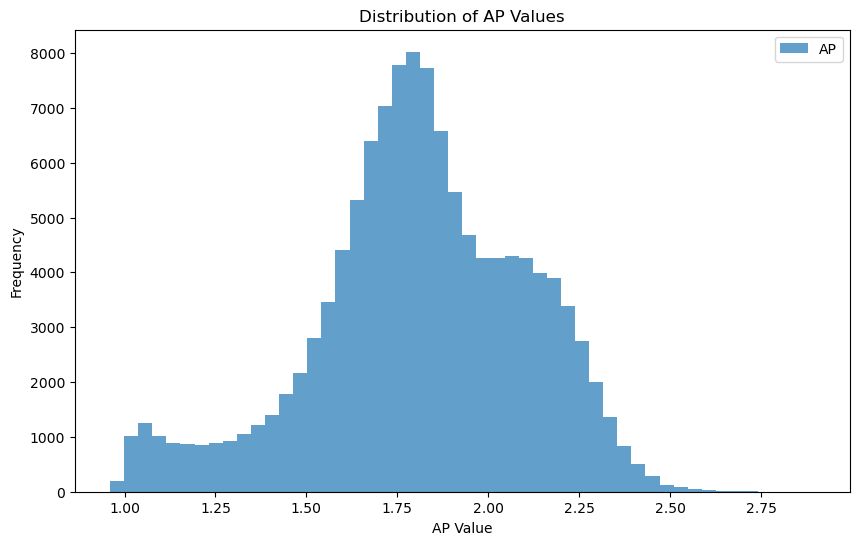

In [64]:
# show the distribution of AP values
plt.figure(figsize=(10, 6))
plt.hist(merged_df['ap'], bins=50, alpha=0.7, label='AP')
plt.xlabel('AP Value')
plt.ylabel('Frequency')
plt.title('Distribution of AP Values')
plt.legend()

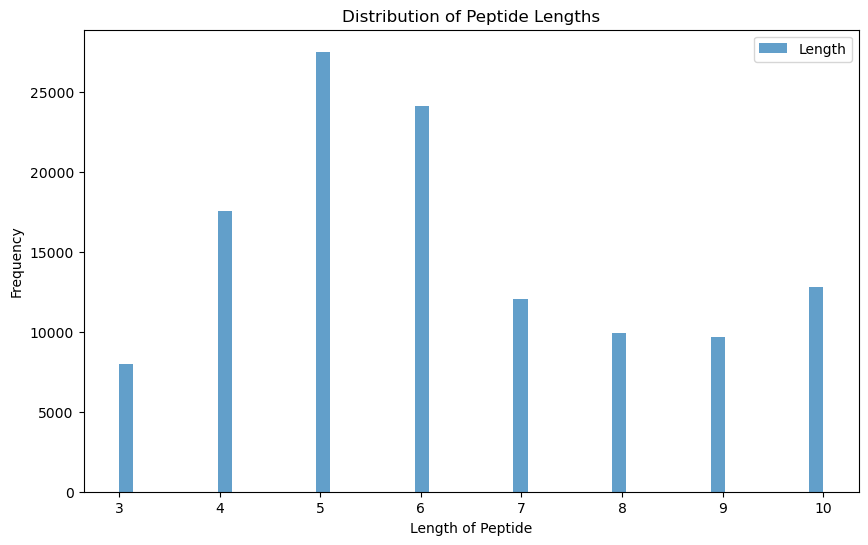

In [65]:
# show distribution of length
plt.figure(figsize=(10, 6))
plt.hist(merged_df['len'], bins=50, alpha=0.7, label='Length')
plt.xlabel('Length of Peptide')
plt.ylabel('Frequency')
plt.title('Distribution of Peptide Lengths')
plt.legend()

In [66]:
min_ap_cutoff_clas = 1.65
max_ap_cutoff_clas = 1.8

# if ap is between the cutoffs, NaN, otherwise set to 1 if it is above the max cutoff, and 0 if it is below the min cutoff
merged_df['label'] = np.where(
    (merged_df['ap'] >= min_ap_cutoff_clas) & (merged_df['ap'] <= max_ap_cutoff_clas),
    np.nan,
    np.where(merged_df['ap'] > max_ap_cutoff_clas, 1, 0)
)

merged_df

,peptide,ap,len,label
0,AAA,1.041021,3,0.0
1,AAAA,1.062640,4,0.0
2,AAAAA,1.090202,5,0.0
3,AAAAAA,1.453839,6,0.0
4,AAAAAAA,1.440201,7,0.0
...,...,...,...,...
121631,YYYYYWY,1.950630,7,1.0
121632,YYYYYY,2.036407,6,1.0
121633,YYYYYYF,2.006736,7,1.0
121634,YYYYYYW,1.891694,7,1.0


In [67]:
#convert peptide to index in merged_df
merged_df.set_index('peptide', inplace=True)
merged_df

,ap,len,label
peptide,,,
AAA,1.041021,3,0.0
AAAA,1.062640,4,0.0
AAAAA,1.090202,5,0.0
AAAAAA,1.453839,6,0.0
AAAAAAA,1.440201,7,0.0
...,...,...,...
YYYYYWY,1.950630,7,1.0
YYYYYY,2.036407,6,1.0
YYYYYYF,2.006736,7,1.0


In [ ]:
metrics_df.drop(columns=["peptide_id"], inplace=True)
metrics_df

In [ ]:
metrics_no_ap_df.drop(columns=["peptide_id"], inplace=True)
metrics_no_ap_df

<Axes: title={'center': 'Label Distribution'}, xlabel='label'>

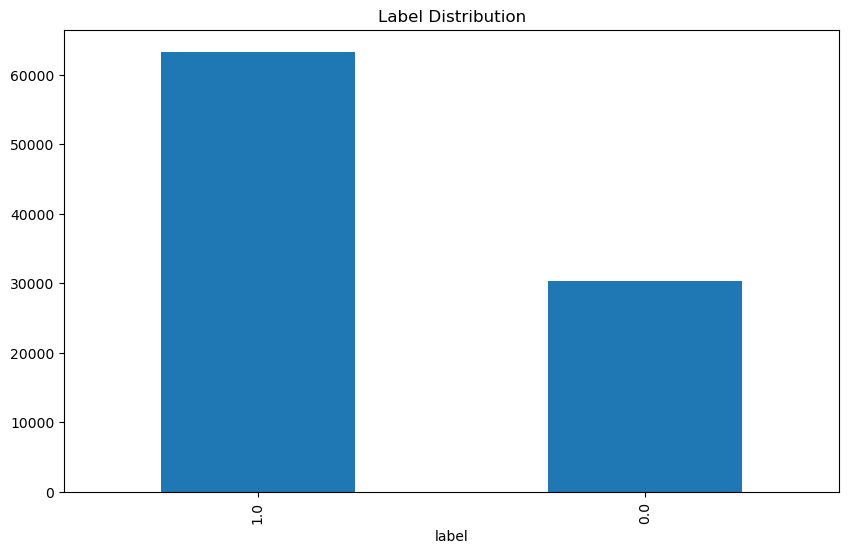

In [70]:
merged_df['label'].value_counts().plot(kind='bar', title='Label Distribution', figsize=(10, 6))

In [71]:
# create df with peptides in experimental_df that are in merged_df, keep label from both dataframes, name the columns 'label_experimental' and 'label_merged'
experimental_merged_df = pd.merge(
    experimental_df[['label']],
    merged_df[['label', 'ap']],
    left_index=True,
    right_index=True,
    suffixes=('_experimental', '_merged')
)
experimental_merged_df

,label_experimental,label_merged,ap
peptide,,,
VQIVYK,1,NaN,1.794431
DFY,1,0.0,1.568246
GFIL,1,1.0,1.909931
KFG,1,0.0,1.611523
KYF,1,1.0,2.140500
IVD,1,0.0,1.294660
IID,1,0.0,1.463638
LFF,1,1.0,2.586269
VVVVV,1,1.0,2.106170


In [ ]:
merged_df = merged_df.join(metrics_df, how="outer")
merged_df

In [ ]:
merged_df = merged_df.combine_first(metrics_no_ap_df)
merged_df

In [75]:
merged_df["len"] = merged_df.index.str.len()
merged_df['len'].value_counts()

len
5     33932
6     30788
10    19446
7     18656
4     17578
8     16640
9     16080
3      8000
11        7
12        3
Name: count, dtype: int64

In [ ]:
merged_df["len"] = merged_df.index.str.len()
merged_df.rename(columns={"label": "is_assembled"}, inplace=True)
merged_df = merged_df.astype({"is_assembled": np.float64, "ap": np.float64})
merged_df = merged_df[merged_df['len'] < 11]
merged_df

In [77]:
# create 'has_beta_sheet_content' column based on 'beta_sheet_fraction' column
# if 'beta_sheet_fraction' is greater than 0, set 'has_beta_sheet_content' to 1, otherwise 0
# if it is NaN, set it to NaN

merged_df['has_beta_sheet_content'] = np.where(
    merged_df['beta_sheet_fraction'] > 0,
    1,
    np.where(merged_df['beta_sheet_fraction'].isna(), np.nan, 0)
)

merged_df['has_beta_sheet_content'].value_counts()

has_beta_sheet_content
0.0    80780
1.0       90
Name: count, dtype: int64

In [ ]:
merged_df = merged_df[merged_df['len'] > 2]
merged_df

In [79]:
merged_df[['ap', 'len', 'is_assembled', 'has_beta_sheet_content', 'net_charge', 'hydrophobic_moment']]

,ap,len,is_assembled,has_beta_sheet_content,net_charge,hydrophobic_moment
peptide,,,,,,
AAA,1.041021,3,0.0,NaN,NaN,NaN
AAAA,1.062640,4,0.0,NaN,NaN,NaN
AAAAA,1.090202,5,0.0,NaN,NaN,NaN
AAAAAA,1.453839,6,0.0,NaN,NaN,NaN
AAAAAAA,1.440201,7,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...
YYYYYWY,1.950630,7,1.0,NaN,NaN,NaN
YYYYYY,2.036407,6,1.0,NaN,NaN,NaN
YYYYYYF,2.006736,7,1.0,NaN,NaN,NaN


In [80]:
merged_df[['ap', 'len', 'is_assembled', 'has_beta_sheet_content', 'net_charge', 'hydrophobic_moment']].describe()

,ap,len,is_assembled,has_beta_sheet_content,net_charge,hydrophobic_moment
count,121652.000000,161120.000000,93668.000000,80870.000000,80870.000000,80870.000000
mean,1.811302,6.526763,0.675823,0.001113,-0.022839,0.303241
std,0.295339,2.043186,0.468069,0.033342,1.287768,0.231739
min,0.959986,3.000000,0.000000,0.000000,-6.000000,0.000000
25%,1.650000,5.000000,0.000000,0.000000,-1.000000,0.120000
50%,1.812784,6.000000,1.000000,0.000000,0.000000,0.256000
75%,2.021446,8.000000,1.000000,0.000000,1.000000,0.436000
max,2.897030,10.000000,1.000000,1.000000,6.000000,1.998000


In [ ]:
# check rows with NaN ap
nan_ap_rows = merged_df[merged_df['ap'].isna()]
nan_ap_rows

# Analysis

In [28]:
columns_to_analyze = [
    'is_assembled', 'ap', 'len', 'net_charge', 'hydrophobic_moment', 'has_beta_sheet_content',
]

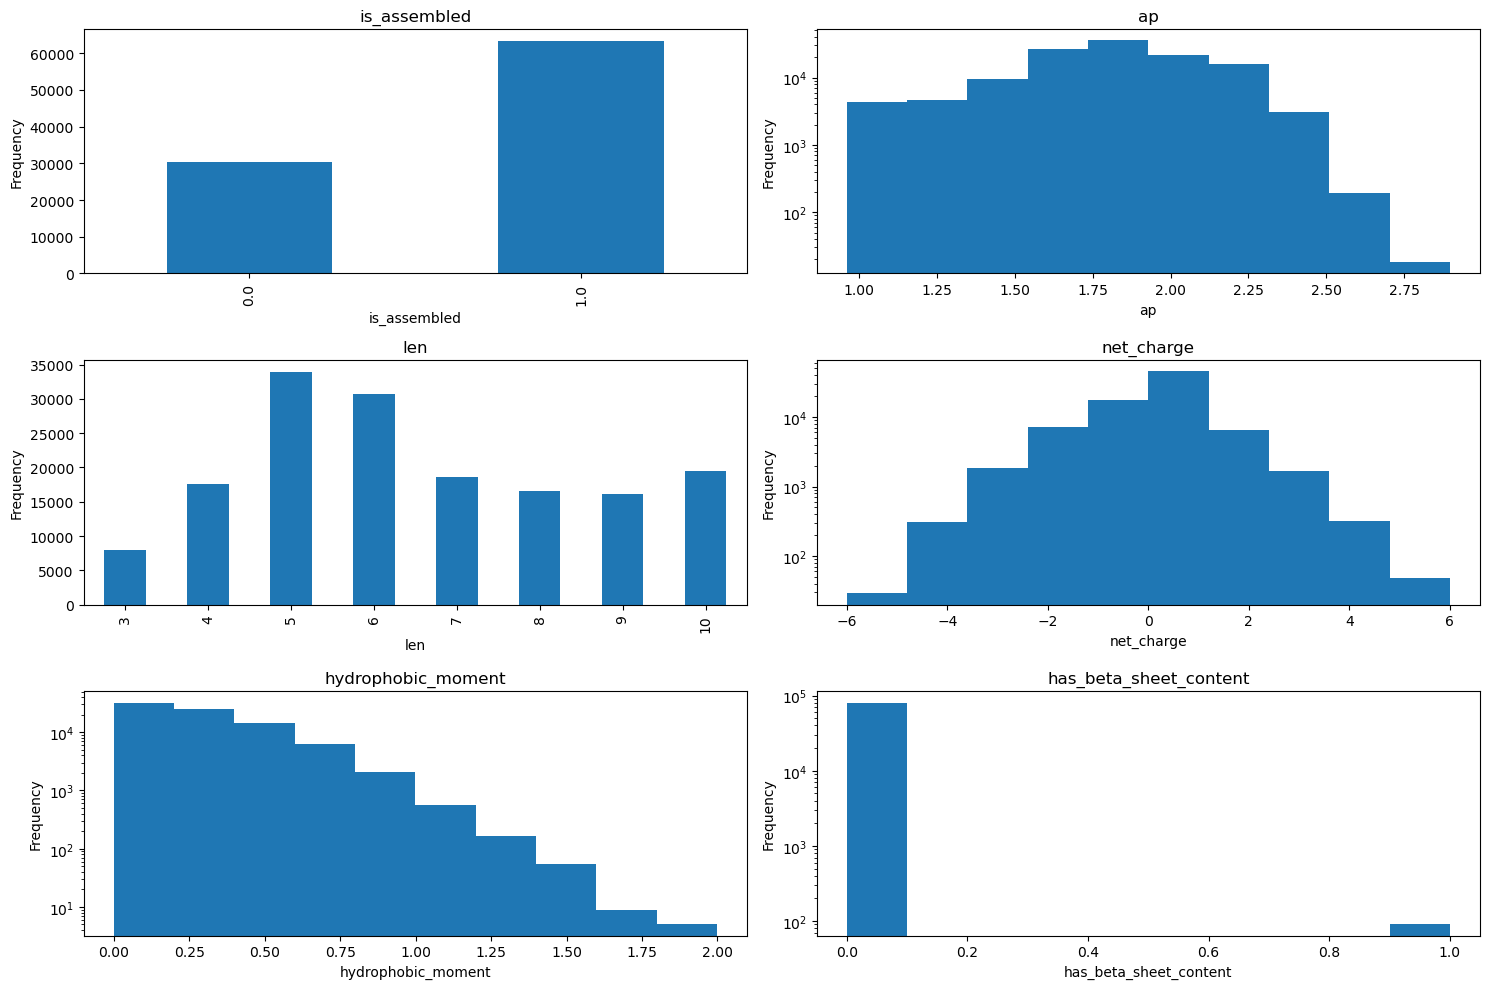

In [29]:
# plot distributions of all columns in merged_df in one figure, log in y when needed, order 'len' by number
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_analyze, 1):
    plt.subplot(3, 2, i)
    if col == 'len' or col == 'is_assembled':
        merged_df[col].value_counts().sort_index().plot(kind='bar', title=col)
    else:
        merged_df[col].plot(kind='hist', logy=True, title=col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

        

# Normalize

In [ ]:
norm_columns = ['ap', 'is_assembled',
                'hydrophobic_moment', 'has_beta_sheet_content',
                'net_charge', 
                ]

merged_df[norm_columns].min(), merged_df[norm_columns].max()

(ap                        0.959986
 is_assembled              0.000000
 hydrophobic_moment        0.000000
 has_beta_sheet_content    0.000000
 net_charge               -6.000000
 dtype: float64,
 ap                        2.89703
 is_assembled              1.00000
 hydrophobic_moment        1.99800
 has_beta_sheet_content    1.00000
 net_charge                6.00000
 dtype: float64)

In [ ]:
# save unnormalized data
merged_df[norm_columns].to_csv('merged_all_no_norm.csv')

In [32]:
merged_df[norm_columns] = (merged_df[norm_columns] - merged_df[norm_columns].min()) / (merged_df[norm_columns].max() - merged_df[norm_columns].min())
merged_df[norm_columns].head()

,ap,is_assembled,hydrophobic_moment,has_beta_sheet_content,net_charge
peptide,,,,,
AAA,0.041834,0.0,NaN,NaN,NaN
AAAA,0.052995,0.0,NaN,NaN,NaN
AAAAA,0.067224,0.0,NaN,NaN,NaN
AAAAAA,0.254952,0.0,NaN,NaN,NaN
AAAAAAA,0.247911,0.0,NaN,NaN,NaN


In [33]:
merged_df[norm_columns + ['len']].to_csv('merged_all.csv')